In [71]:
import numpy as np

In [72]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x, y

In [73]:
a = [11,12,13,14,15]
a

[11, 12, 13, 14, 15]

In [85]:
b = [15,16,17,18,19]
b

[15, 16, 17, 18, 19]

In [86]:
x_a,y_a = ecdf(a)
x_a,y_a

(array([11, 12, 13, 14, 15]), array([ 0.2,  0.4,  0.6,  0.8,  1. ]))

In [87]:
x_b,y_b = ecdf(b)
x_b,y_b

(array([15, 16, 17, 18, 19]), array([ 0.2,  0.4,  0.6,  0.8,  1. ]))

In [88]:
import matplotlib.pyplot as plt

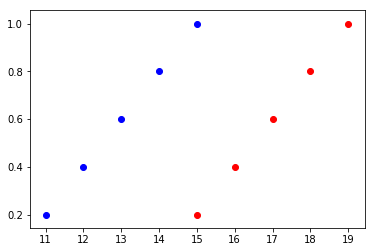

In [89]:
plt.scatter(x_a,y_a,color='blue')
plt.scatter(x_b,y_b,color='red')
plt.show()

In [90]:
def perm_sample(data1,data2):
    data = np.concatenate((data1,data2))
    permutated_data = np.random.permutation(data)
    perm_sample1 = permutated_data[:len(data1)]
    perm_sample2 = permutated_data[len(data1):]
    return perm_sample1,perm_sample2

In [91]:
x_sample,y_sample = perm_sample(a,b)
x_sample,y_sample

(array([15, 19, 12, 14, 17]), array([15, 16, 11, 13, 18]))

In [92]:
np.mean(b) - np.mean(a)

4.0

In [93]:
np.mean(y_sample) - np.mean(x_sample)

-0.80000000000000071

In [94]:
c = np.empty_like(a)
for i in range(5):
    x_sample,y_sample = perm_sample(a,b)
    c[i] = np.mean(y_sample) - np.mean(x_sample)
print(c)    

[ 0 -2  0  0 -2]


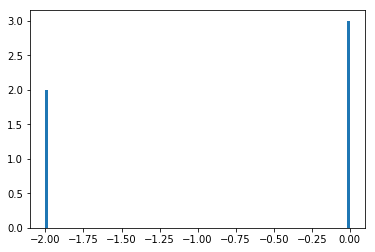

In [96]:
plt.hist(c,bins=100)
plt.show()

In [97]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

In [104]:
a

[11, 12, 13, 14, 15]

In [105]:
b

[15, 16, 17, 18, 19]

In [106]:
draw_bs_pairs_linreg(a,b,size=10)

TypeError: only integer scalar arrays can be converted to a scalar index